In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-03-23,378830
2020-03-24,422574
2020-03-25,471035
2020-03-26,531865
2020-03-27,596366


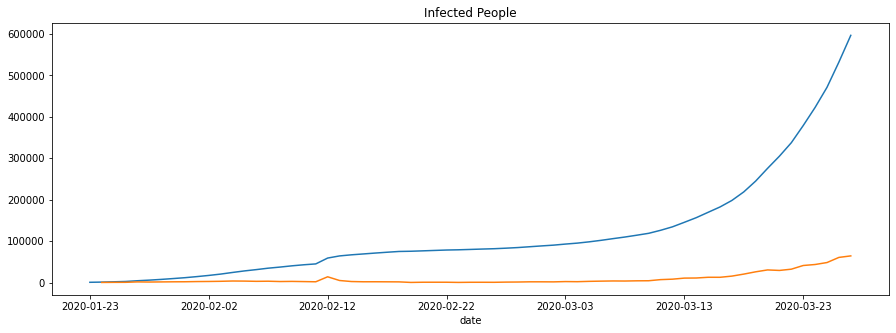

In [5]:
data.infected.plot(figsize=(15, 5), title='Infected People')
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [6]:
from pyramid.arima import auto_arima

In [7]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1187.116, BIC=1199.974, Fit time=8.647 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1190.847, BIC=1195.133, Fit time=0.038 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1191.733, BIC=1198.162, Fit time=0.816 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1191.916, BIC=1198.346, Fit time=0.203 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1181.773, BIC=1192.489, Fit time=2.683 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1185.283, BIC=1193.855, Fit time=1.851 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1177.777, BIC=1190.635, Fit time=4.820 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1193.531, BIC=1202.104, Fit time=0.642 seconds
Fit ARIMA: order=(2, 2, 4); AIC=1202.651, BIC=1219.796, Fit time=8.799 seconds
Fit ARIMA: order=(0, 2, 3); AIC=1191.108, BIC=1201.823, Fit time=0.995 seconds
Fit ARIMA: order=(2, 2, 3); AIC=1188.430, BIC=1203.432, Fit time=9.717 seconds
Fit ARIMA: order=(1, 2, 4); AIC=1179.608, BIC=1194.610, Fit time=2.792 seconds
Total fit time: 42.079 seconds


In [8]:
stepwise_model.aic()

1177.7766726776936

In [9]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [10]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [11]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [12]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-28 - 664348
2020-03-29 - 738659
2020-03-30 - 819603
2020-03-31 - 907093
2020-04-01 - 1001042
